como sistemas de massas molas vibram

autovalores = frequecia ** 2
autovetores = amplitudes de deslocamento relativo de cada massa

In [1]:
# Importação de bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

eixo x = frequencias naturais ao quadrado

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def construir_matriz_dinamica(massas, k=1.0):
    """
    Constrói a matriz dinâmica para uma cadeia 1D com condições de contorno periódicas.
    
    Args:
        massas (np.array): Um array com os valores de massa de cada átomo na cadeia.
        k (float): O valor da constante de mola (assumida igual para todas as molas).
        
    Returns:
        np.array: A matriz dinâmica (NxN) do sistema.
    """
    N = len(massas)
    matriz = np.zeros((N, N))
    
    for i in range(N):
        # A mola da esquerda e da direita de cada átomo é k.
        # Para um sistema periódico, cada átomo está conectado a dois outros.
        matriz[i, i] = 2 * k / massas[i]
        
        # Elemento vizinho da direita (com condição periódica)
        j_direita = (i + 1) % N
        matriz[i, j_direita] = -k / massas[i]

        # Elemento vizinho da esquerda (com condição periódica)
        j_esquerda = (i - 1) % N
        matriz[i, j_esquerda] = -k / massas[i]
        
    return matriz

def rodar_simulacao_e_analise(N, massa_defeito=None):
    """
    Executa a simulação completa para uma cadeia de tamanho N.
    
    Args:
        N (int): O número de átomos na cadeia.
        massa_defeito (float, optional): Se fornecido, um defeito com esta massa 
                                          será colocado no centro da cadeia.
                                          
    Returns:
        tuple: Uma tupla contendo (autovalores_ordenados, autovetores_ordenados).
    """
    k = 1.0
    massas = np.ones(N) # Começa com uma cadeia homogênea de massa 1
    
    # Introduz o defeito no centro da cadeia, se especificado
    if massa_defeito is not None:
        posicao_central = N // 2
        massas[posicao_central] = massa_defeito
        
    # Constrói a matriz dinâmica
    matriz = construir_matriz_dinamica(massas, k)
    
    # Calcula autovalores (w2) e autovetores usando np.linalg
    w2, autovetores = np.linalg.eig(matriz)
    
    # Ordena os resultados com base nos autovalores (frequências)
    indices_ordenados = np.argsort(w2)
    w2_ordenado = w2[indices_ordenados]
    autovetores_ordenados = autovetores[:, indices_ordenados]
    
    # ---- CORREÇÃO AQUI ----
    return w2_ordenado, autovetores_ordenados

In [17]:
# Usar um N pequeno para facilitar a visualização
N_pequeno = 5
massa_defeito_valor = 3.0

# --- Matriz Homogênea ---
massas_homo_pequeno = np.ones(N_pequeno)
matriz_homo_pequena = construir_matriz_dinamica(massas_homo_pequeno)

# --- Matriz com Defeito ---
massas_def_pequeno = np.ones(N_pequeno)
massas_def_pequeno[N_pequeno // 2] = massa_defeito_valor # Defeito no centro
matriz_def_pequena = construir_matriz_dinamica(massas_def_pequeno)

# Configura a impressão para melhor legibilidade
np.set_printoptions(precision=3, suppress=True)

print("--- Matriz Dinâmica para N=5 (Homogênea) ---")
print(matriz_homo_pequena)
print("\nNote que a matriz é 'Toeplitz circulante': as diagonais são constantes e ela 'dá a volta'.")

print("\n\n--- Matriz Dinâmica para N=5 (Com Defeito no Átomo 2) ---")
print(matriz_def_pequena)
print(f"\nObserve que apenas a linha {N_pequeno // 2} (do átomo com massa={massa_defeito_valor}) foi alterada.")

--- Matriz Dinâmica para N=5 (Homogênea) ---
[[ 2. -1.  0.  0. -1.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [-1.  0.  0. -1.  2.]]

Note que a matriz é 'Toeplitz circulante': as diagonais são constantes e ela 'dá a volta'.


--- Matriz Dinâmica para N=5 (Com Defeito no Átomo 2) ---
[[ 2.    -1.     0.     0.    -1.   ]
 [-1.     2.    -1.     0.     0.   ]
 [ 0.    -0.333  0.667 -0.333  0.   ]
 [ 0.     0.    -1.     2.    -1.   ]
 [-1.     0.     0.    -1.     2.   ]]

Observe que apenas a linha 2 (do átomo com massa=3.0) foi alterada.


In [12]:
# Parâmetros da simulação
N_100 = 100
massa_defeito_valor = 3.0 # Uma massa 3 vezes maior que as outras

# 1. Rodar para a cadeia homogênea
print(f"Rodando simulação para N={N_100} (Cadeia Homogênea)...")
w2_homo_100, avet_homo_100 = rodar_simulacao_e_analise(N=N_100)

# 2. Rodar para a cadeia com defeito
print(f"Rodando simulação para N={N_100} (Cadeia com Defeito de massa {massa_defeito_valor})...")
w2_def_100, avet_def_100 = rodar_simulacao_e_analise(N=N_100, massa_defeito=massa_defeito_valor)

print("Simulações para N=100 concluídas.")

Rodando simulação para N=100 (Cadeia Homogênea)...
Rodando simulação para N=100 (Cadeia com Defeito de massa 3.0)...
Simulações para N=100 concluídas.


<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
C:\Users\i.cipola\AppData\Local\Temp\ipykernel_1660\26718794.py:8: SyntaxWarning: invalid escape sequence '\o'
  ax1.set_xlabel('$\omega^2$')
C:\Users\i.cipola\AppData\Local\Temp\ipykernel_1660\26718794.py:14: SyntaxWarning: invalid escape sequence '\o'
  ax2.set_xlabel('$\omega^2$')


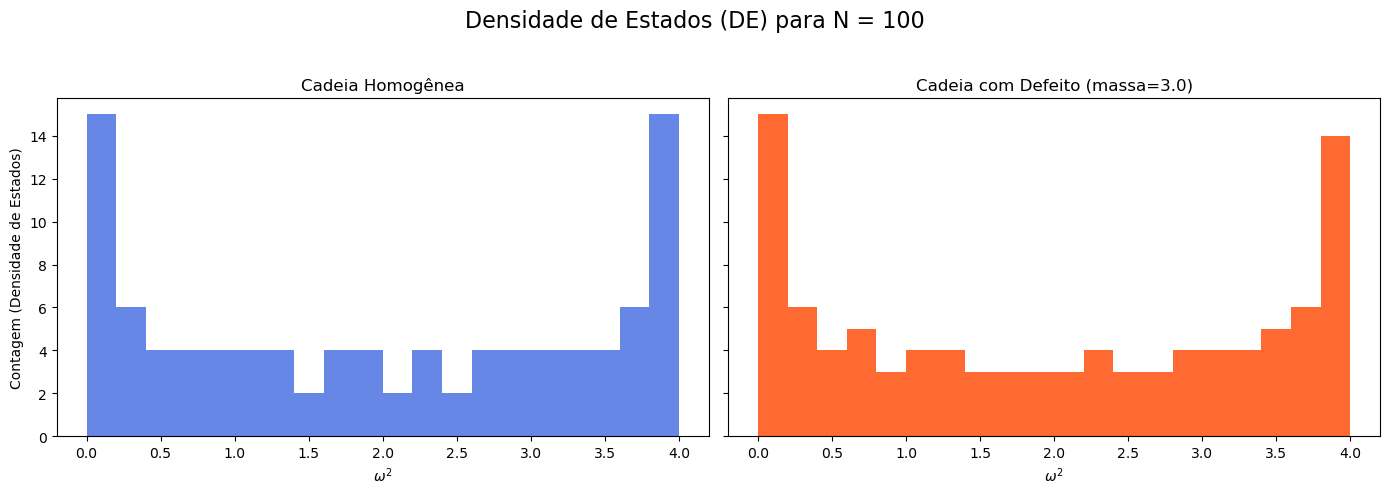

In [13]:
# Plotando a Densidade de Estados para N=100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True, sharex=True)
fig.suptitle('Densidade de Estados (DE) para N = 100', fontsize=16)

# Histograma da cadeia homogênea
ax1.hist(w2_homo_100, bins=20, color='royalblue', alpha=0.8)
ax1.set_title('Cadeia Homogênea')
ax1.set_xlabel('$\omega^2$')
ax1.set_ylabel('Contagem (Densidade de Estados)')

# Histograma da cadeia com defeito
ax2.hist(w2_def_100, bins=20, color='orangered', alpha=0.8)
ax2.set_title(f'Cadeia com Defeito (massa={massa_defeito_valor})')
ax2.set_xlabel('$\omega^2$')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
C:\Users\i.cipola\AppData\Local\Temp\ipykernel_1660\1625668225.py:10: SyntaxWarning: invalid escape sequence '\o'
  axes[0, i].set_title(f'Modo {i+1}\n$\omega^2$ = {autovalores[i]:.4f}')
C:\Users\i.cipola\AppData\Local\Temp\ipykernel_1660\1625668225.py:18: SyntaxWarning: invalid escape sequence '\o'
  axes[1, i].set_title(f'Modo {idx+1}\n$\omega^2$ = {autovalores[idx]:.4f}')


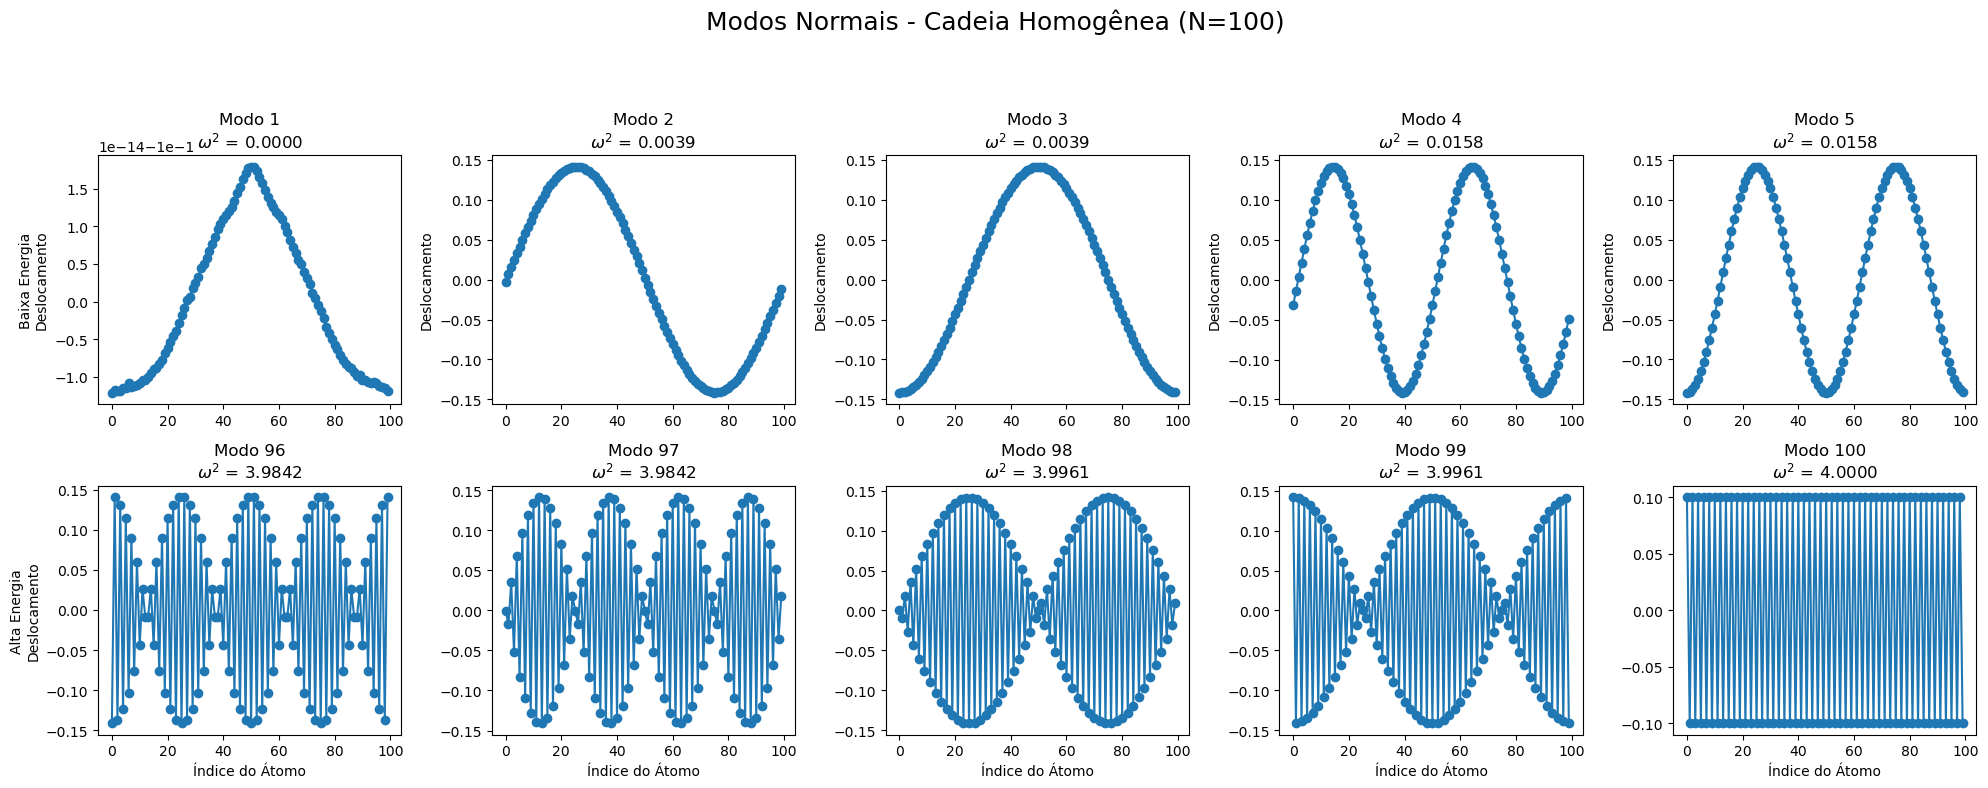

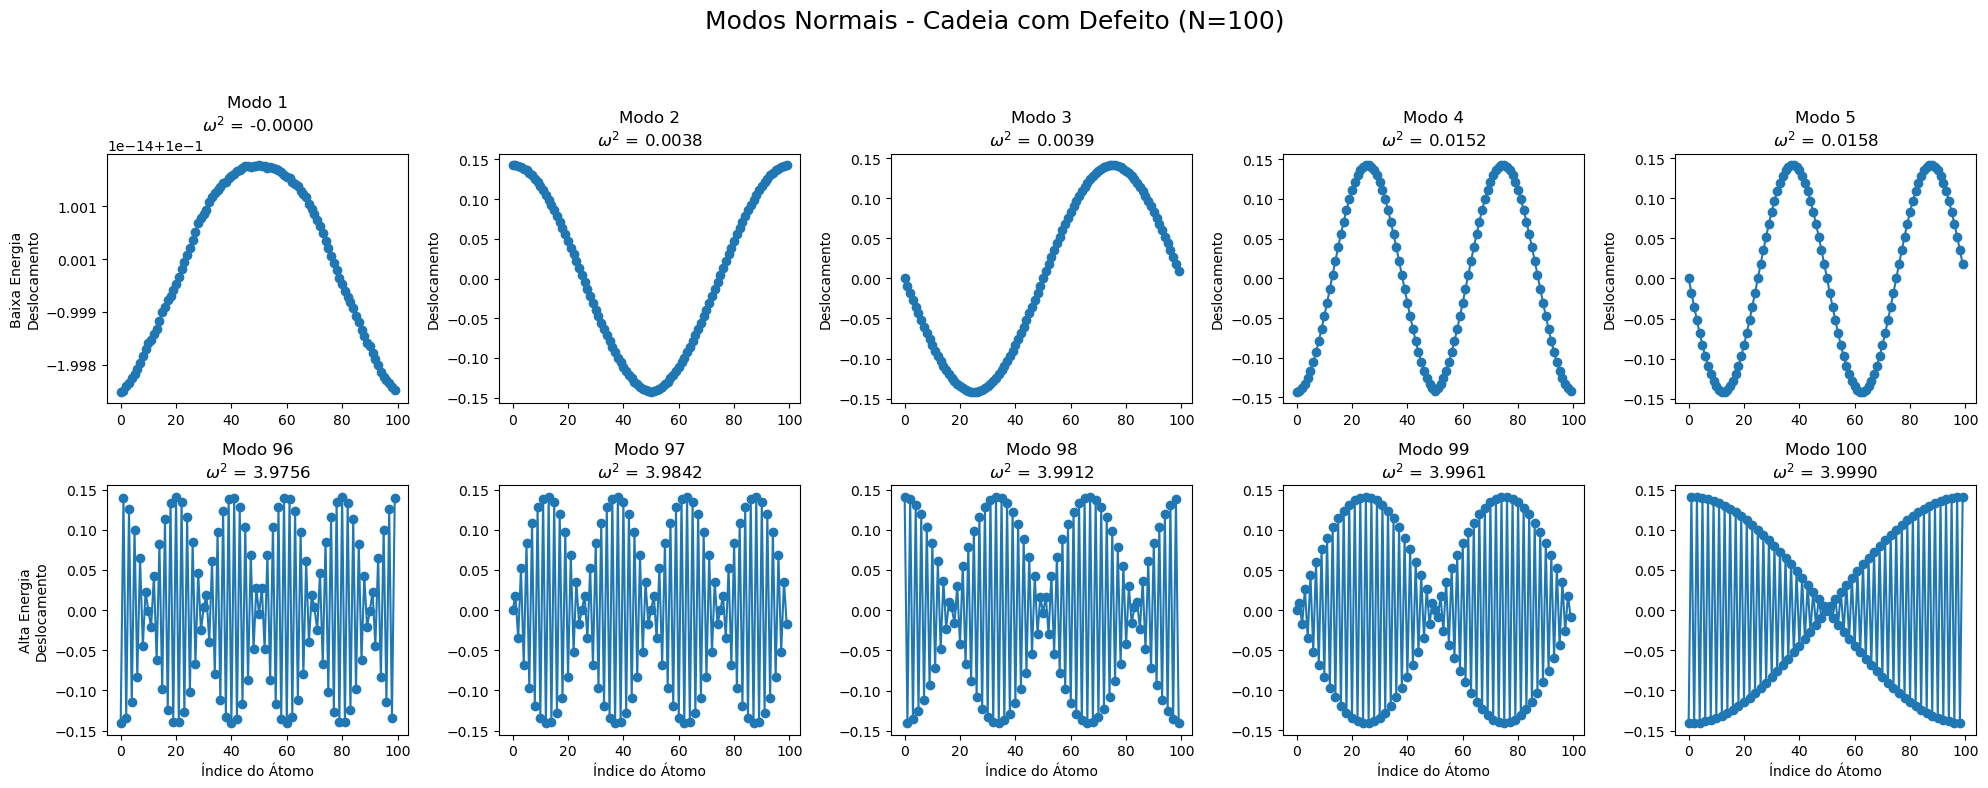

In [14]:
def plotar_modos(autovetores, autovalores, N, titulo):
    """Função auxiliar para plotar os modos de vibração."""
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle(titulo, fontsize=18)
    x = np.arange(N)
    
    # 5 menores frequências
    for i in range(5):
        axes[0, i].plot(x, autovetores[:, i], 'o-')
        axes[0, i].set_title(f'Modo {i+1}\n$\omega^2$ = {autovalores[i]:.4f}')
        axes[0, i].set_ylabel('Deslocamento')
        if i==0: axes[0,i].set_ylabel('Baixa Energia\nDeslocamento')
    
    # 5 maiores frequências
    for i in range(5):
        idx = N - 5 + i
        axes[1, i].plot(x, autovetores[:, idx], 'o-')
        axes[1, i].set_title(f'Modo {idx+1}\n$\omega^2$ = {autovalores[idx]:.4f}')
        axes[1, i].set_xlabel('Índice do Átomo')
        if i==0: axes[1,i].set_ylabel('Alta Energia\nDeslocamento')

    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

# Plotar para o caso homogêneo
plotar_modos(avet_homo_100, w2_homo_100, N_100, 'Modos Normais - Cadeia Homogênea (N=100)')

# Plotar para o caso com defeito
plotar_modos(avet_def_100, w2_def_100, N_100, f'Modos Normais - Cadeia com Defeito (N=100)')

In [15]:
# Parâmetros da simulação
N_1000 = 1000
massa_defeito_valor = 3.0 # Mesma massa do defeito

# 1. Rodar para a cadeia homogênea
print(f"Rodando simulação para N={N_1000} (Cadeia Homogênea)...")
w2_homo_1000, avet_homo_1000 = rodar_simulacao_e_analise(N=N_1000)

# 2. Rodar para a cadeia com defeito
print(f"Rodando simulação para N={N_1000} (Cadeia com Defeito de massa {massa_defeito_valor})...")
w2_def_1000, avet_def_1000 = rodar_simulacao_e_analise(N=N_1000, massa_defeito=massa_defeito_valor)

print("Simulações para N=1000 concluídas.")

Rodando simulação para N=1000 (Cadeia Homogênea)...
Rodando simulação para N=1000 (Cadeia com Defeito de massa 3.0)...
Simulações para N=1000 concluídas.


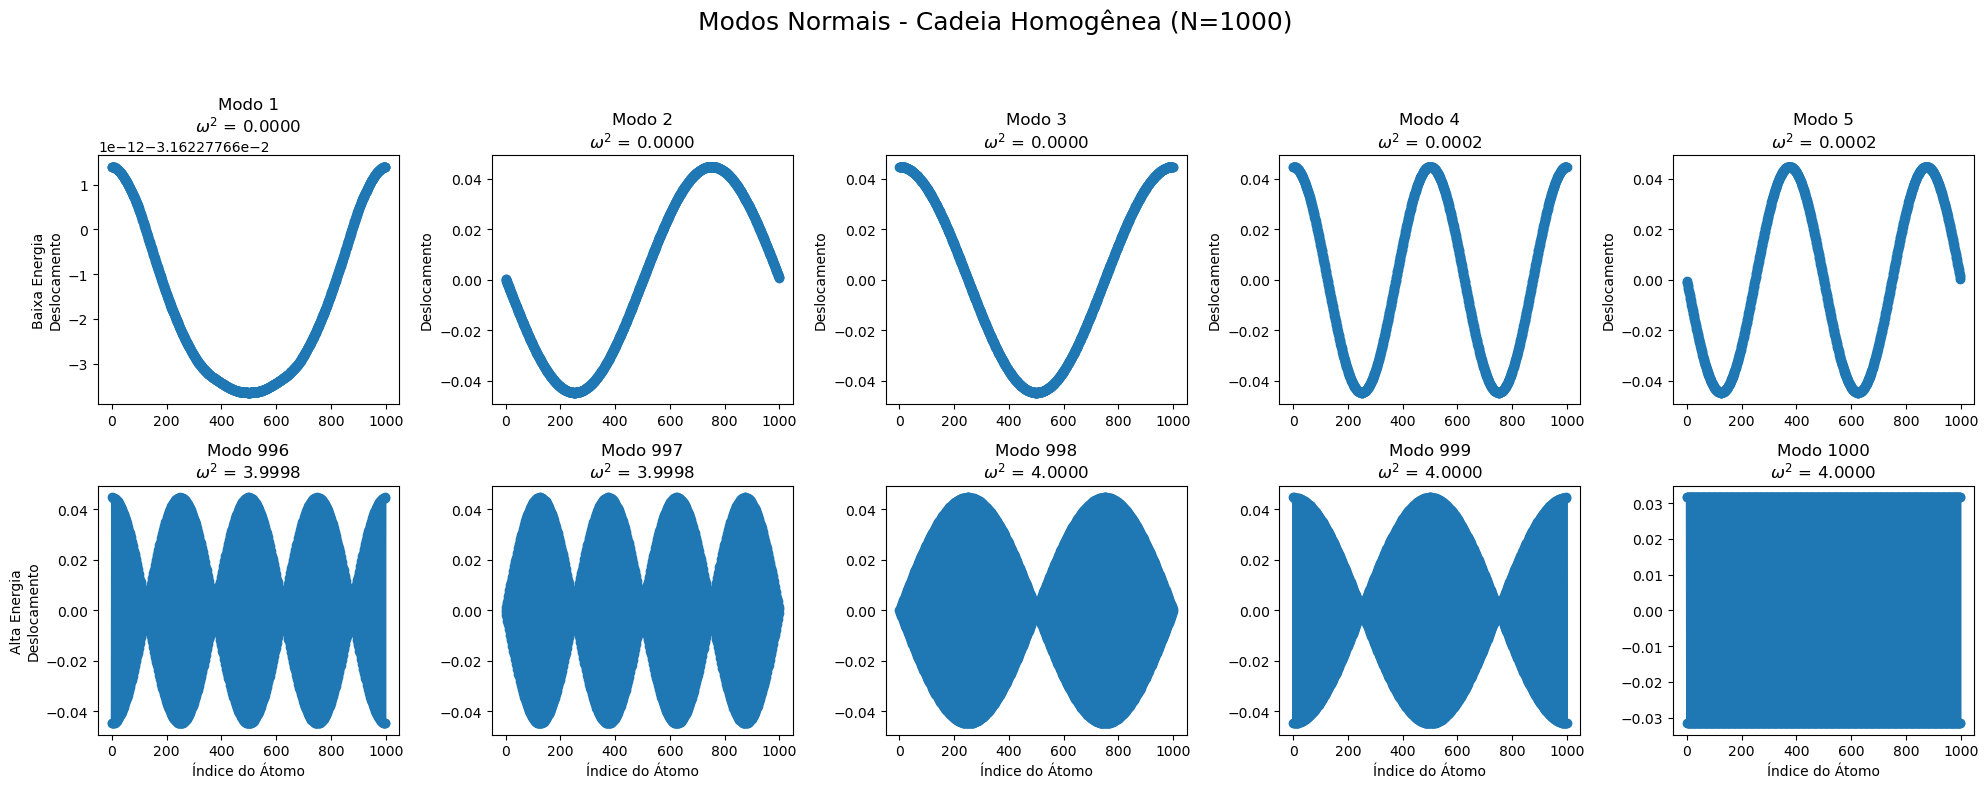

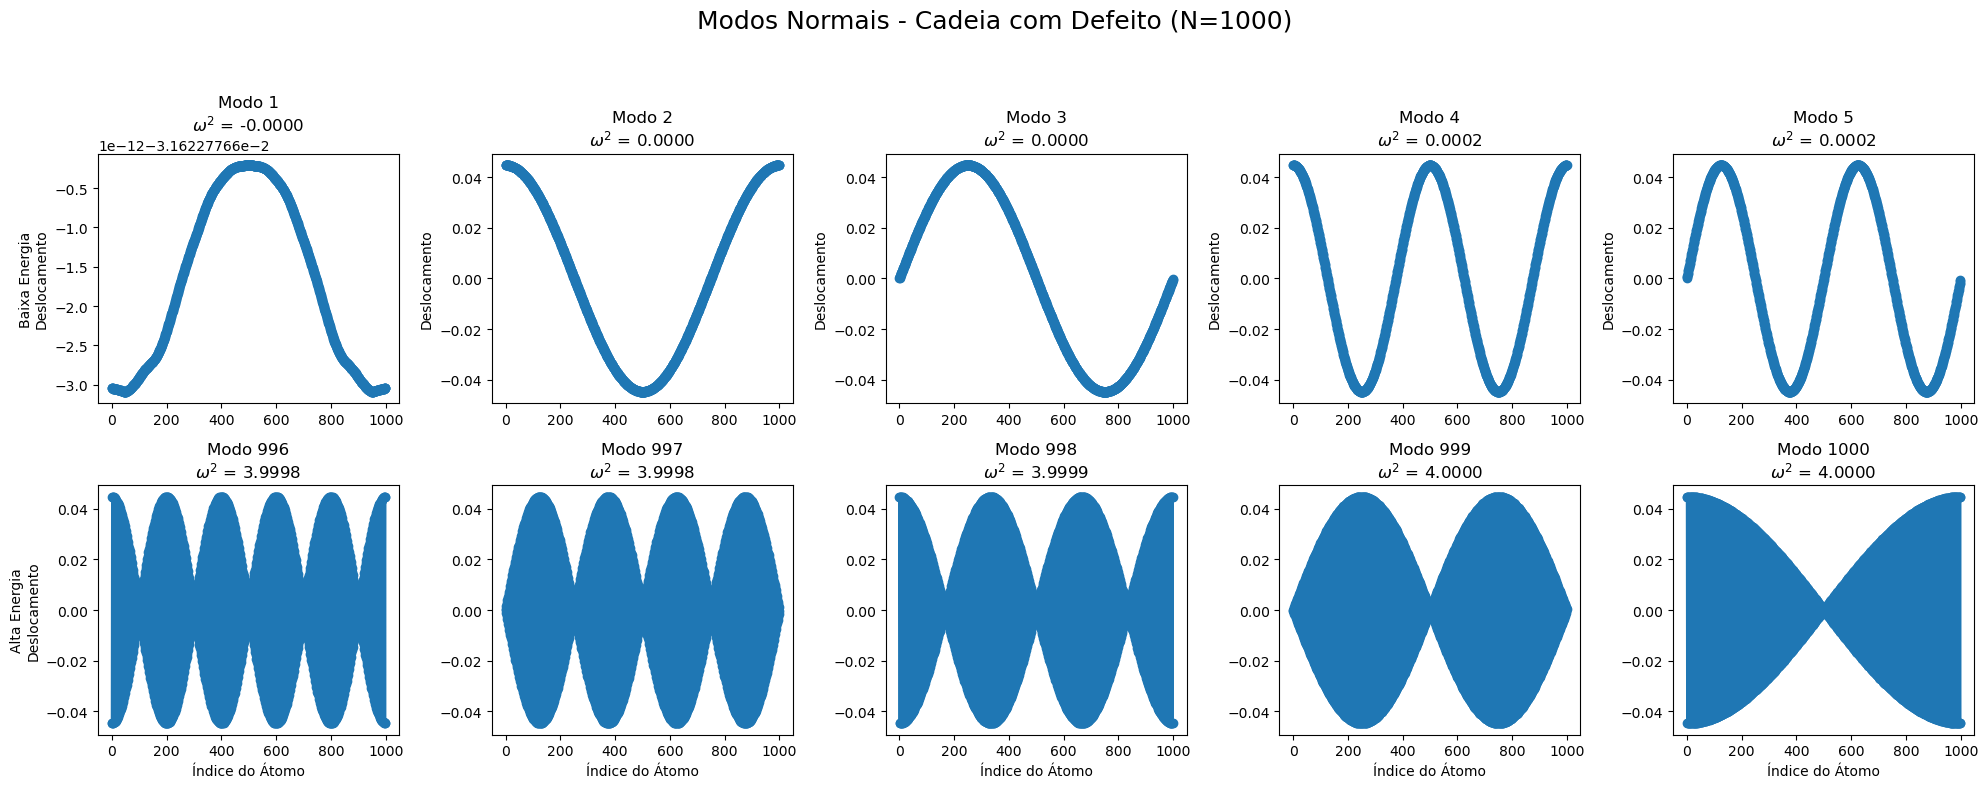

In [16]:
# Plotar para o caso homogêneo
plotar_modos(avet_homo_1000, w2_homo_1000, N_1000, 'Modos Normais - Cadeia Homogênea (N=1000)')

# Plotar para o caso com defeito
plotar_modos(avet_def_1000, w2_def_1000, N_1000, f'Modos Normais - Cadeia com Defeito (N=1000)')

Iniciando simulação temporal para N=100...
Simulação concluída.


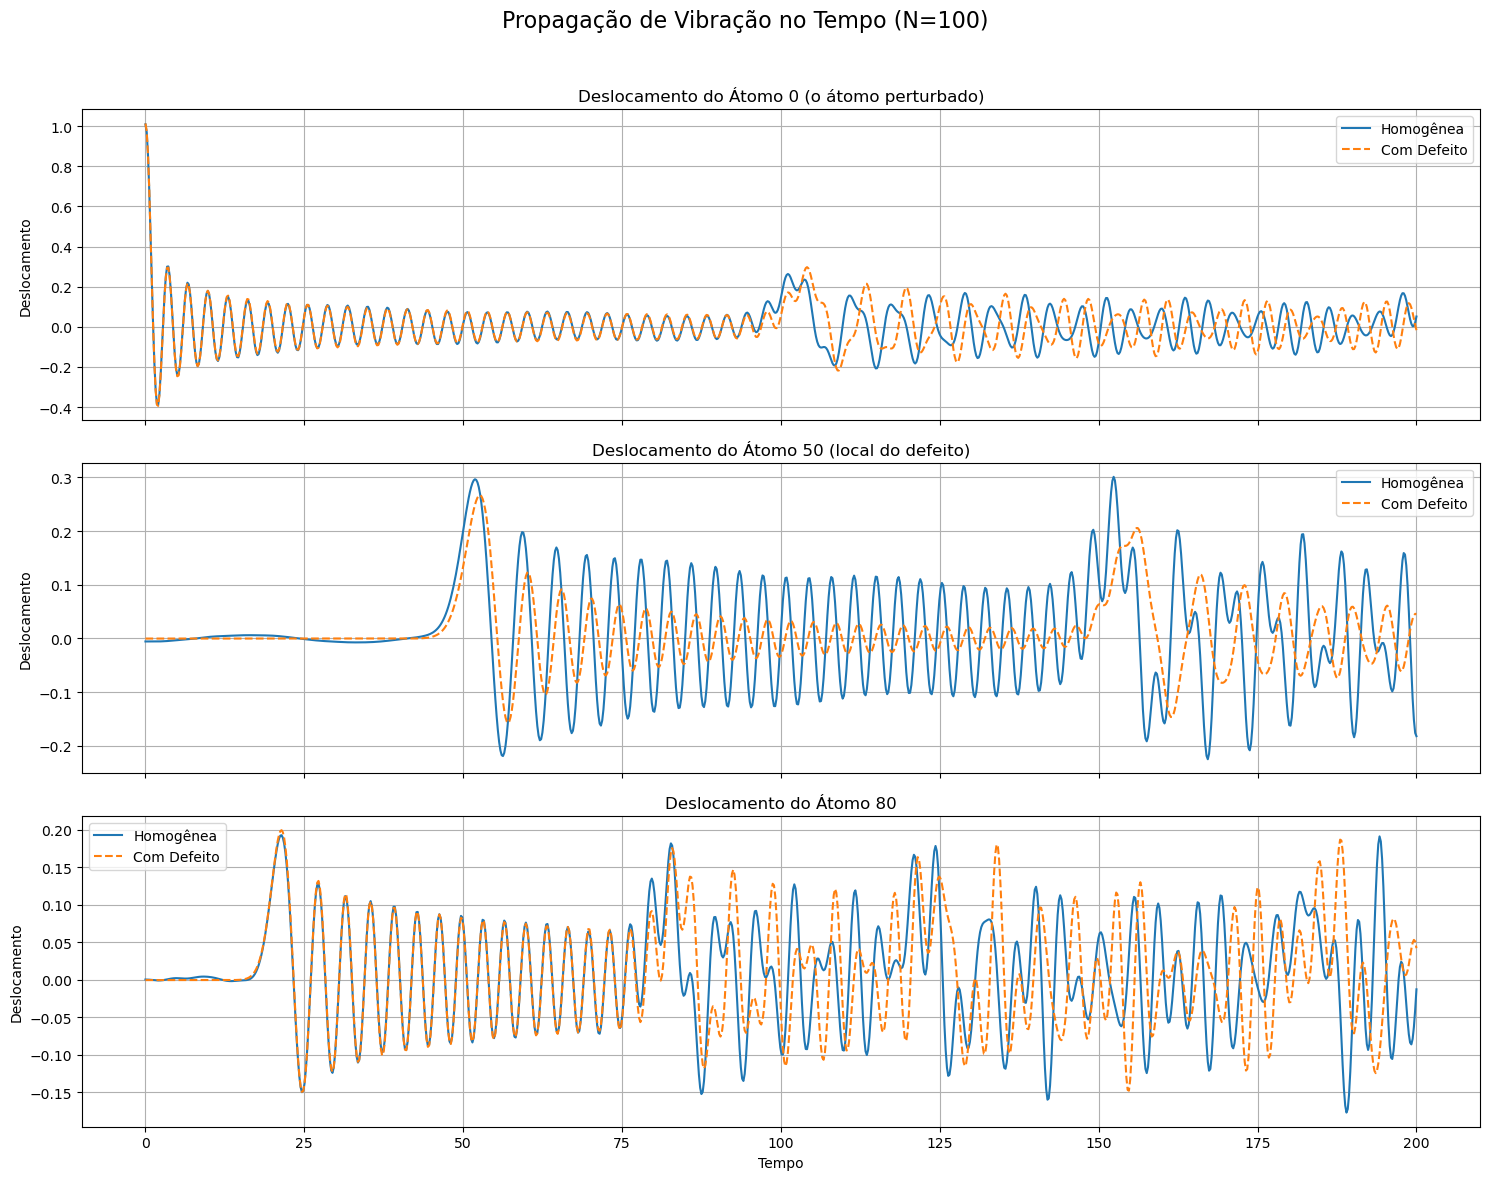

In [18]:
def simular_vibracao_temporal(w2, autovetores, T_final=200, n_passos=1000):
    """
    Simula a evolução temporal do sistema a partir de uma condição inicial.
    
    Args:
        w2 (np.array): Autovalores (omega^2).
        autovetores (np.array): Autovetores (matriz onde cada coluna é um modo).
        T_final (int): Tempo total da simulação.
        n_passos (int): Número de passos de tempo.
        
    Returns:
        tuple: (tempo, posicoes), onde posicoes é uma matriz (N x n_passos).
    """
    N = autovetores.shape[0]
    
    # Calcula as frequências angulares (omega), tratando o caso de w2=0
    w = np.sqrt(np.abs(w2))
    
    # Condição inicial: desloca o primeiro átomo (x_0 = 1) e os outros ficam parados.
    x0 = np.zeros(N)
    x0[0] = 1.0
    
    # Projeta a condição inicial na base de autovetores para achar as amplitudes de cada modo
    # Para velocidade inicial zero, as amplitudes são A_j = x0 . v_j
    amplitudes = np.dot(x0, autovetores)
    
    # Cria o vetor de tempo
    tempo = np.linspace(0, T_final, n_passos)
    
    # Calcula a posição de cada átomo em cada instante de tempo
    # x_i(t) = sum_j (Amplitude_j * Autovetor_ij * cos(w_j * t))
    posicoes = np.zeros((N, n_passos))
    for j in range(N): # Soma sobre todos os modos j
        termo_modo_j = np.outer(autovetores[:, j], np.cos(w[j] * tempo))
        posicoes += amplitudes[j] * termo_modo_j
        
    return tempo, posicoes

# Rodar a simulação temporal para os casos de N=100
print("Iniciando simulação temporal para N=100...")
tempo, pos_homo_100 = simular_vibracao_temporal(w2_homo_100, avet_homo_100)
_, pos_def_100 = simular_vibracao_temporal(w2_def_100, avet_def_100)
print("Simulação concluída.")

# --- Visualização ---
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Propagação de Vibração no Tempo (N=100)', fontsize=16)

# Átomos a serem plotados
atomo_inicial = 0
atomo_central = N_100 // 2
atomo_distante = N_100 - 20

# Plot para o átomo inicial (0)
axes[0].plot(tempo, pos_homo_100[atomo_inicial, :], label='Homogênea')
axes[0].plot(tempo, pos_def_100[atomo_inicial, :], label='Com Defeito', linestyle='--')
axes[0].set_title(f'Deslocamento do Átomo {atomo_inicial} (o átomo perturbado)')
axes[0].set_ylabel('Deslocamento')
axes[0].legend()
axes[0].grid(True)

# Plot para o átomo central (50) - onde está o defeito
axes[1].plot(tempo, pos_homo_100[atomo_central, :], label='Homogênea')
axes[1].plot(tempo, pos_def_100[atomo_central, :], label='Com Defeito', linestyle='--')
axes[1].set_title(f'Deslocamento do Átomo {atomo_central} (local do defeito)')
axes[1].set_ylabel('Deslocamento')
axes[1].legend()
axes[1].grid(True)


# Plot para um átomo distante (80)
axes[2].plot(tempo, pos_homo_100[atomo_distante, :], label='Homogênea')
axes[2].plot(tempo, pos_def_100[atomo_distante, :], label='Com Defeito', linestyle='--')
axes[2].set_title(f'Deslocamento do Átomo {atomo_distante}')
axes[2].set_xlabel('Tempo')
axes[2].set_ylabel('Deslocamento')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()